In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor

# Read file

In [2]:
PATH ='data/whole_position.csv'
col_names = {'日期' : 'date', '股票代码' : 'name', '次日vwap卖出收益率' : 'y'}
pd.options.display.max_columns = 130
pd.options.display.max_rows= 130

In [3]:
leak_col = ['当日T0收益率', '30%成交上限50万盈亏金额', '降权后30%成交上限50万盈亏金额', '等权10万盈亏金额', '降权后等权10万盈亏金额']
const_col = ['是否被st', '是否交易']

In [4]:
data = pd.read_csv(PATH, encoding='gbk')

In [5]:
# rename key functional cols
data.rename(columns=col_names, inplace=True)

# drop features 
data.drop(leak_col, axis=1, inplace=True)
data.drop(const_col, axis=1, inplace=True)

# convert dates to pd.datetime
data.date = pd.to_datetime(data.date, format='%Y%m%d')

In [6]:
data.shape

(875381, 123)

In [7]:
data.head().T

,0,1,2,3,4
date,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00
name,000007.SZ,000018.SZ,000049.SZ,000059.SZ,000099.SZ
昨日净主动买入额,7.66258e+06,-4.3391e+06,6.27191e+06,3.80723e+07,-4.08592e+06
昨日大单净买入额,4.02081e+06,4.07265e+06,-3.12273e+06,6.32995e+06,-1.0569e+07
昨日大单净主动买入额,2.76474e+06,1.14069e+06,1.16375e+06,2.94006e+07,-5.71747e+06
昨日净主动买入额占比,0.0961051,-0.0402137,0.0905643,0.170227,-0.0350641
昨日大单净买入额占比,0.0504295,0.0377442,-0.0450912,0.0283022,-0.0906998
昨日大单净主动买入额占比,0.0346757,0.0105716,0.0168042,0.131455,-0.0490655
前三日净主动买入额,-1.92516e+06,-1.75964e+07,-1.62721e+07,3.71891e+07,-1.77702e+07
前三日大单净买入额,2.82811e+06,-1.81219e+07,-2.57035e+07,-9.71136e+07,-2.09979e+07


# XGB

In [6]:
X = data.copy()

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25391 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cp

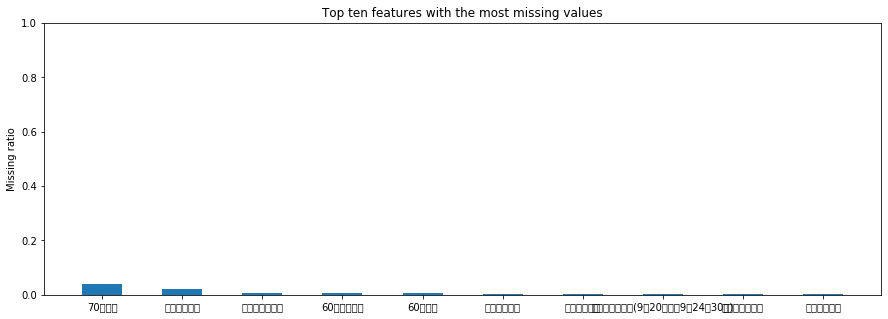

In [12]:
fig, ax = plt.subplots(figsize = (15, 5))
df_na = (X.isnull().sum() / len(X))
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)[: 10]
ax.bar(range(df_na.size), df_na, width = 0.5)
plt.xticks(range(df_na.size), df_na.index, rotation = 0)
plt.ylim([0, 1])
plt.title('Top ten features with the most missing values')
plt.ylabel('Missing ratio')
plt.show()

In [13]:
# top 10 features with missing values, but none at large portion
df_na.index

Index(['70日振幅', '集合竞价昨收', '前二十天换手率', '60日均线斜率', '60日均线', '前十天换手率', '前五天换手率',
       '第二阶段波动率(9点20分至于9点24分30秒)', '第二阶段波动率', '前三天换手率'],
      dtype='object')

In [17]:
# # impute the missing values with the mean of that feature
# from sklearn.impute import SimpleImputer

# imr = SimpleImputer(strategy = 'mean')
# X = imr.fit_transform(X)

(array([22672., 40055., 46416., 39315., 47548., 38639., 32024., 31831.,
        23767., 28584., 20907., 27575., 24441., 25481., 25934.,  3715.,
            0.,     0., 13618., 28263., 19286., 44539., 29984., 30401.,
        23118., 31886., 56278., 36194., 48978., 33932.]),
 array([16440.        , 16511.93333333, 16583.86666667, 16655.8       ,
        16727.73333333, 16799.66666667, 16871.6       , 16943.53333333,
        17015.46666667, 17087.4       , 17159.33333333, 17231.26666667,
        17303.2       , 17375.13333333, 17447.06666667, 17519.        ,
        17590.93333333, 17662.86666667, 17734.8       , 17806.73333333,
        17878.66666667, 17950.6       , 18022.53333333, 18094.46666667,
        18166.4       , 18238.33333333, 18310.26666667, 18382.2       ,
        18454.13333333, 18526.06666667, 18598.        ]),
 <BarContainer object of 30 artists>)

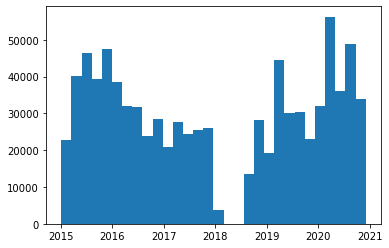

In [14]:
plt.hist(X.date, bins=30)
# data missing from first half of 2018

In [22]:
# X.date.quantile(0.8)

Timestamp('2020-02-19 00:00:00')

In [109]:
X = data.copy()

In [7]:
y = data.y
X = X.drop(['y', 'name', 'date'], axis=1)

# filling missing values/NaN
# X = X.fillna(-999)
# not necessary in XGB

# take out features with infinite values
std = X.describe().loc['std']
drop_features = std[std.isnull()].index.tolist()
X = X.drop(drop_features, axis=1)

# CV split
split = int(X.shape[0]*0.8)
X_train = X[:split]
X_test =  X[split:]
y_train = y[:split]
y_test =  y[split:]

In [20]:
# A quick stock-wise run
stocks = data.name.value_counts()[data.name.value_counts() > 600].index.tolist()

In [22]:
X_0 = data.loc[data.name == stocks[0]]

In [23]:
X_0.shape
# too skewed, never mind

(725, 123)

#### Correlation map

In [10]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(np.hstack([X, y]).T)
cols = list(X.columns[1:28]) + ['y']
hm = heatmap(cm, row_names = cols, column_names = cols, figsize = (20, 20))
plt.title('Correlations Between the Different Features of the Data', fontsize = 20)
plt.show()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [13]:
cm = np.corrcoef(X.T)

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cp

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21313 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38500 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site

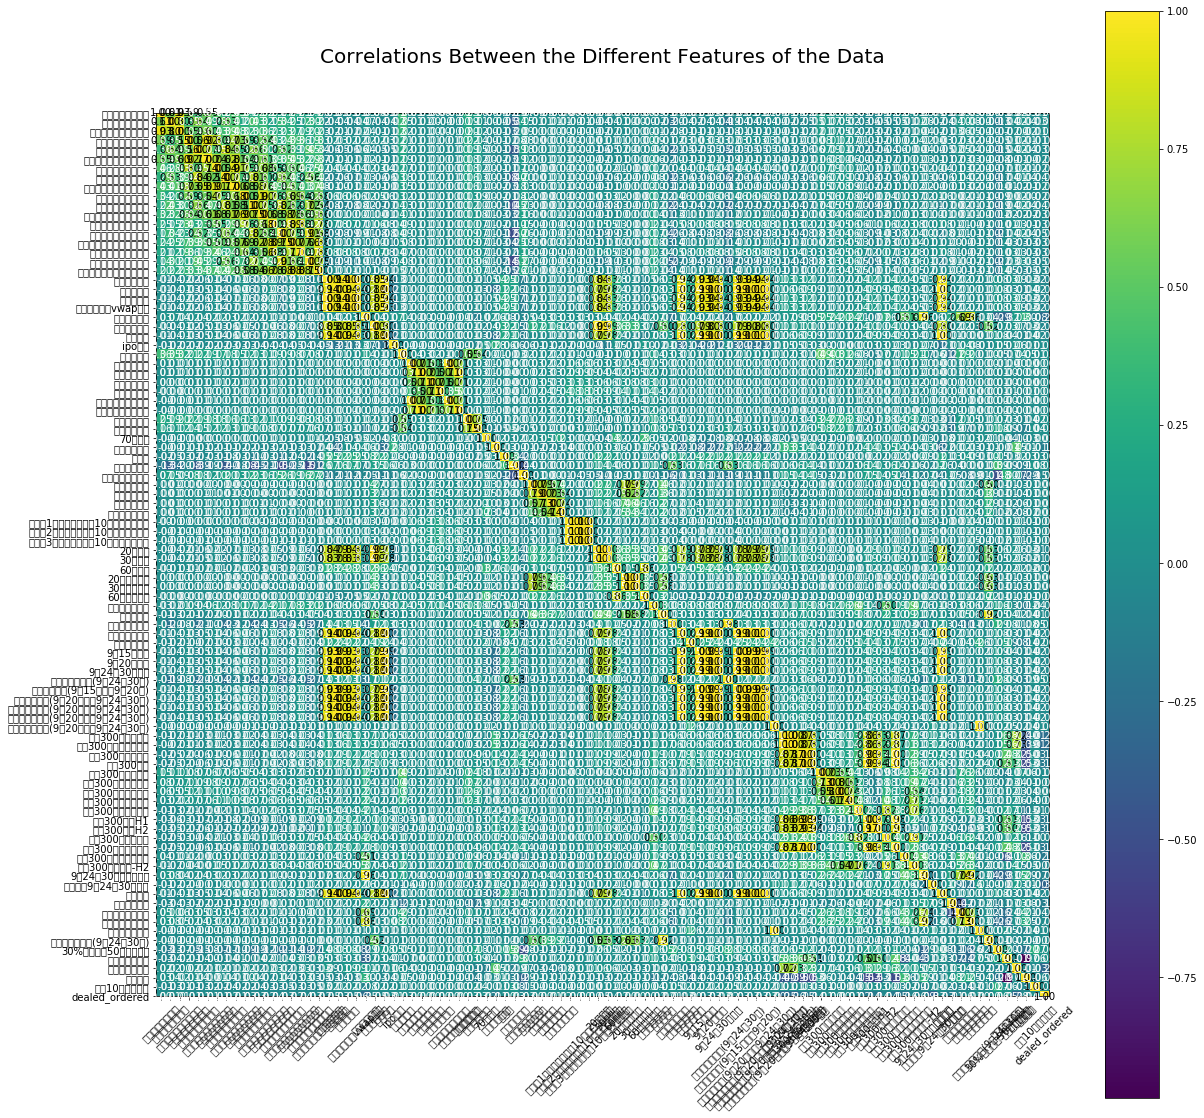

In [14]:
# X only
cols = list(X.columns)
hm = heatmap(cm, row_names = cols, column_names = cols, figsize = (20, 20))
plt.title('Correlations Between the Different Features of the Data', fontsize = 20)
plt.show()

In [ ]:
cm = np.corrcoef(pd.concat([X, y], axis=1))

In [16]:
X.columns

Index(['昨日净主动买入额', '昨日大单净买入额', '昨日大单净主动买入额', '前三日净主动买入额', '前三日大单净买入额',
       '前三日大单净主动买入额', '前五日净主动买入额', '前五日大单净买入额', '前五日大单净主动买入额', '前十日净主动买入额',
       '前十日大单净买入额', '前十日大单净主动买入额', '前二十日净主动买入额', '前二十日大单净买入额', '前二十日大单净主动买入额',
       '前三十日净主动买入额', '前三十日大单净买入额', '前三十日大单净主动买入额', '除权后开盘价', '日线开盘价', '除权后昨收',
       '除权后第二日vwap价格', '开盘价涨跌幅', '除权后收盘价', '日线昨收', 'ipo日期', '昨日涨跌幅', '前两日涨跌幅',
       '前三日涨跌幅', '前五日涨跌幅', '前十日涨跌幅', '前第二日当日涨跌幅', '前第三日当日涨跌幅', '连续上涨天数',
       '连续上涨幅度', '70日振幅', '当日除权因子', '昨市值', '前三天成交额', '前三天成交额排名', '前三天换手率',
       '前五天换手率', '前十天换手率', '前二十天换手率', '之前第1日成交金额比前10天成交金额均值',
       '之前第2日成交金额比前10天成交金额均值', '之前第3日成交金额比前10天成交金额均值', '20日均线', '30日均线',
       '60日均线', '20日均线斜率', '30日均线斜率', '60日均线斜率', '昨日非主流资金', '昨日机器人', '集合竞价成交额',
       '集合竞价成交价', '集合竞价昨收', '9点15分价格', '9点20分价格', '9点24分30秒价格',
       '第二阶段成交额(9点24分30秒)', '第一阶段均价(9点15分至于9点20分)', '第二阶段均价(9点20分至于9点24分30秒)',
       '第二阶段最高价(9点20分至于9点24分30秒)', '第二阶段最低价(9点20分至于9点24分30秒)',
       '第二阶段波动率(9点20分至于9点24分30秒)', '沪深300昨日总市值'

In [17]:
X['y'] = y

In [19]:
cm = np.corrcoef(X.T)

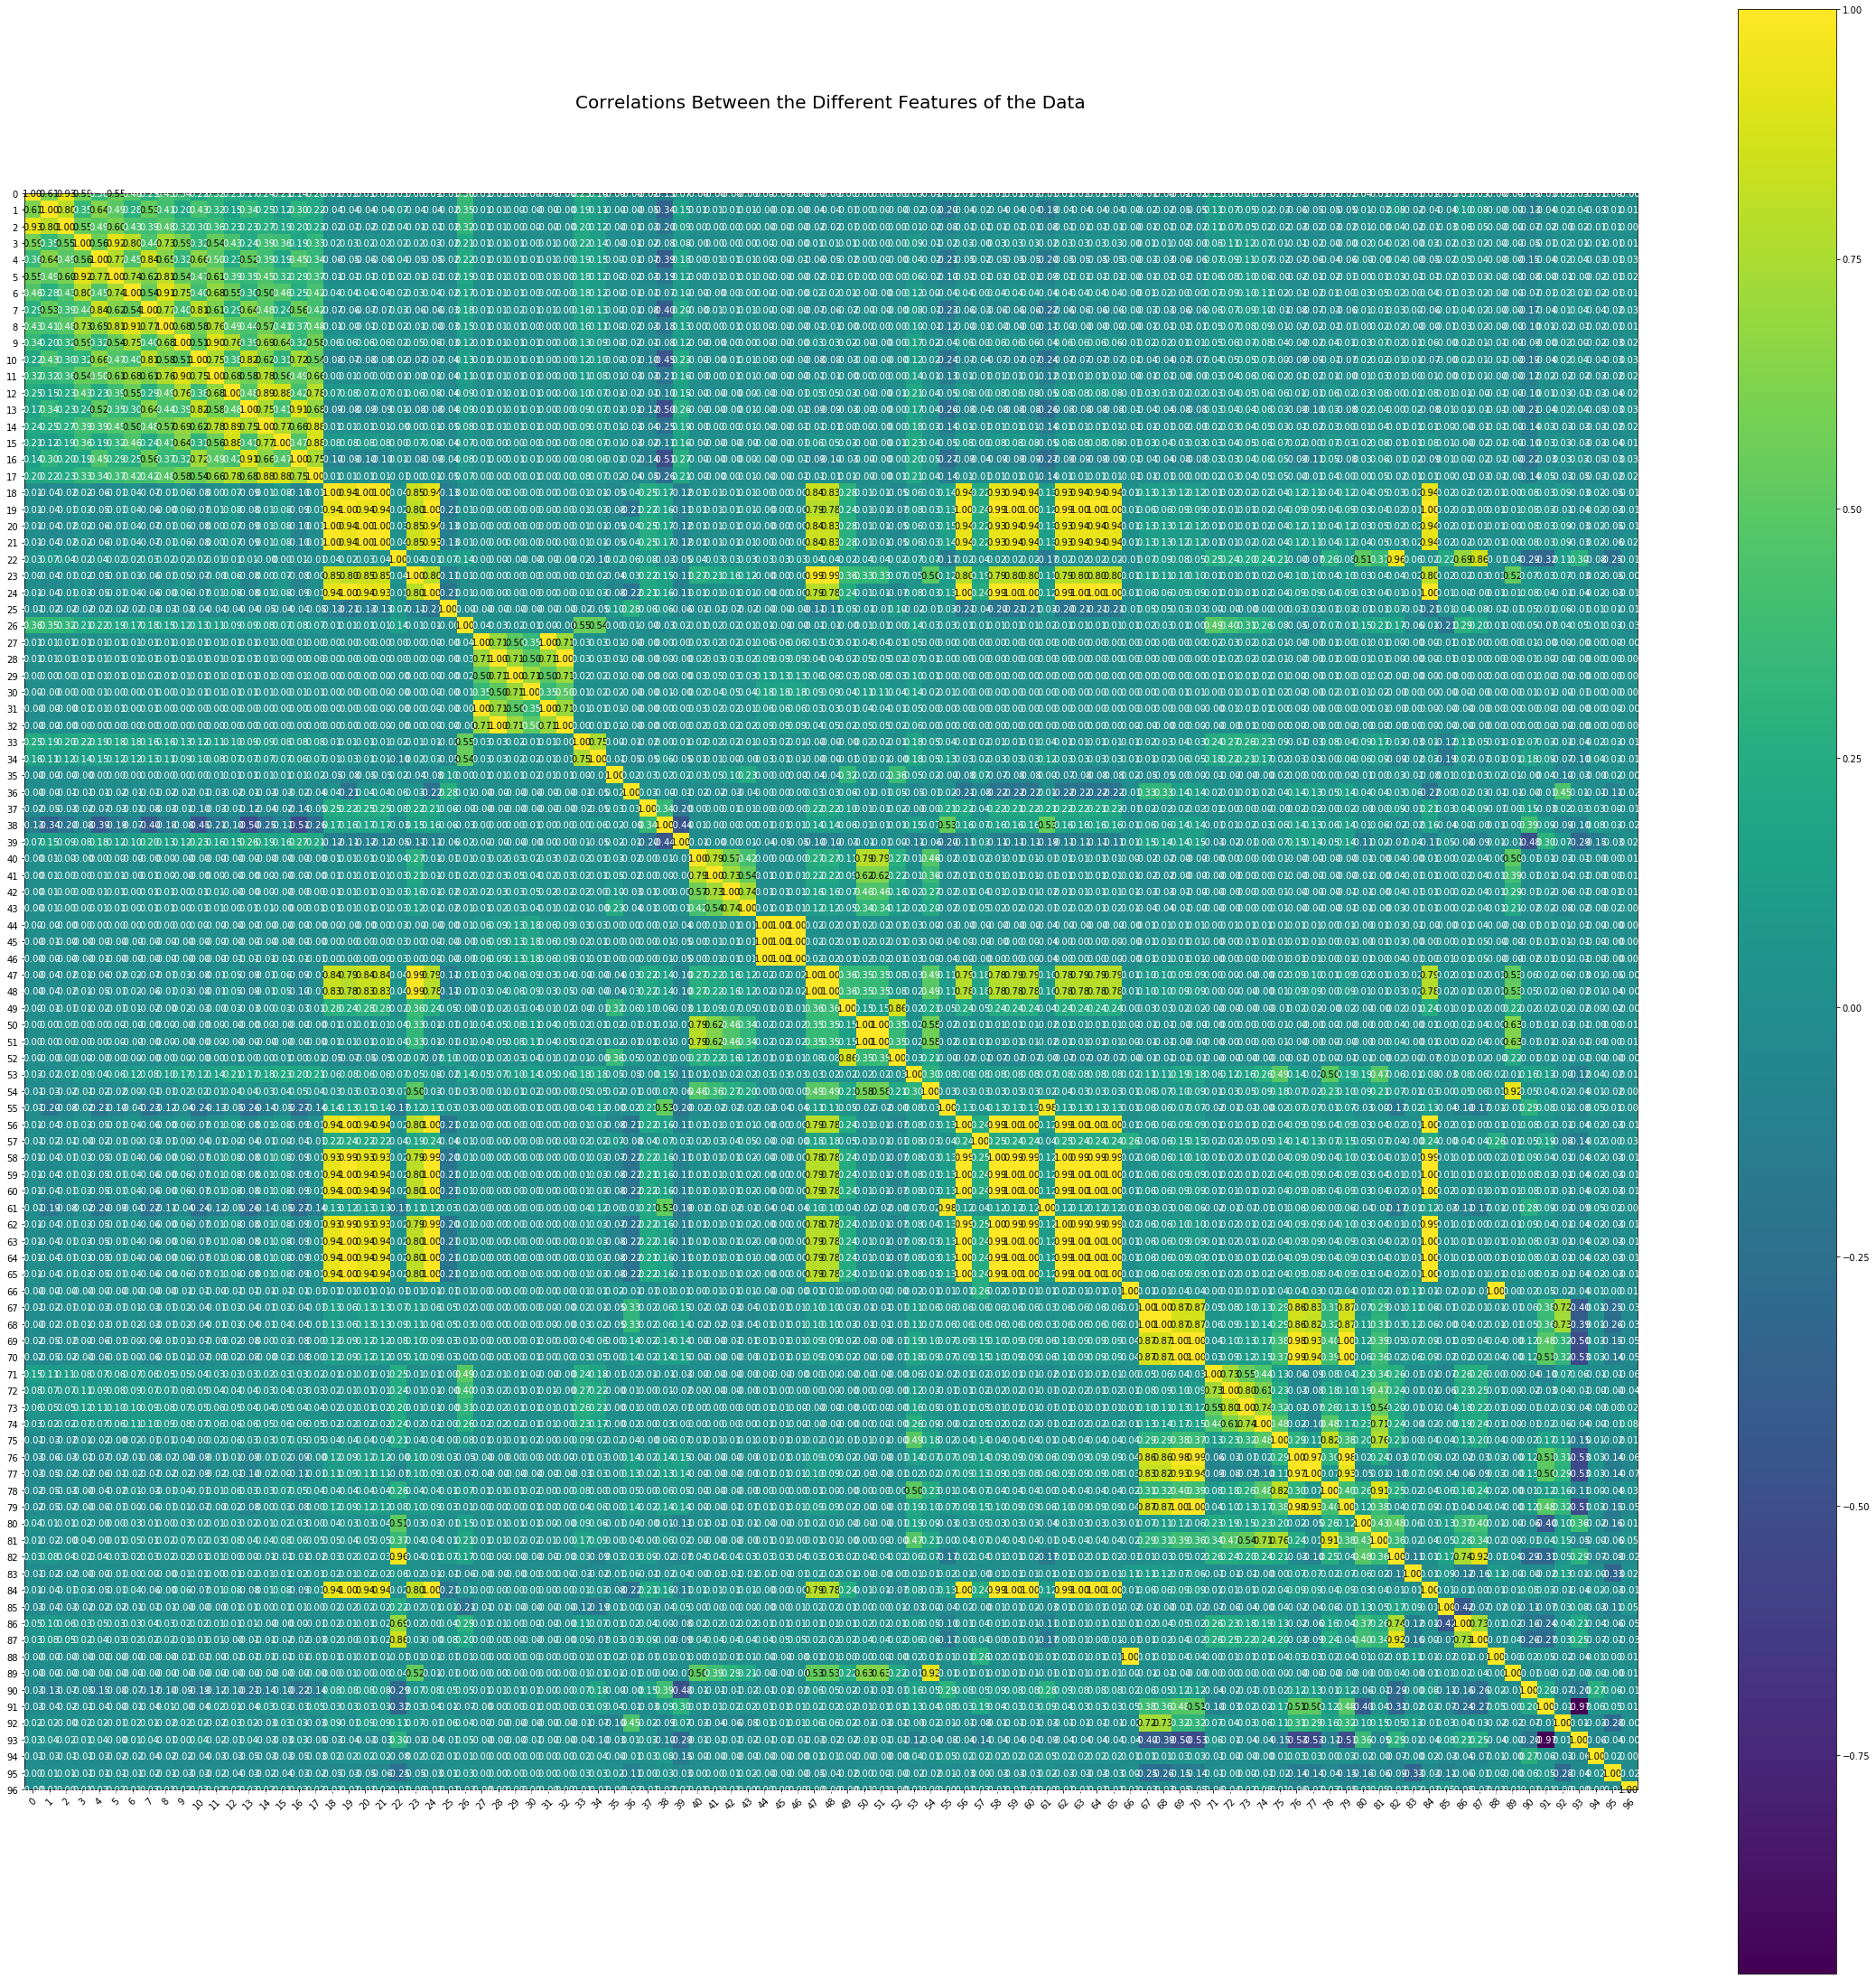

<Figure size 432x288 with 0 Axes>

In [21]:
# X only
cols = list(np.arange(len(X.columns)))
hm = heatmap(cm, row_names = cols, column_names = cols, figsize = (40, 40))
plt.title('Correlations Between the Different Features of the Data', fontsize = 20)
plt.show()
plt.savefig("corr_matrix.png", dpi=300)

In [22]:
X.columns[96]

'y'

### Feature selection

In [8]:
def huber_approx_obj(y_true, y_pred):
    z = y_pred - y_true
    delta = 1
    scale = 1 + (z/delta)**2
    scale_sqrt = np.sqrt(scale)
    grad = z/scale_sqrt
    hess = 1/(scale*scale_sqrt)
    return grad, hess

In [95]:
dtrain = xgb.DMatrix(X_train, label = y_train)

param = { 'verbosity': 0,
          'objective': 'reg:logistic',
          'eval_metric': 'mae',
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'tree_method': 'hist', #'gpu_hist',
          'eta': 0.1,
          'max_depth': 5,
          'gamma': 0,
          'min_child_weight': 1 }

bst = xgb.cv(param, dtrain, nfold = 3, num_boost_round = 1000, early_stopping_rounds = 50)

MemoryError: Unable to allocate 513. MiB for an array with shape (96, 700304) and data type float64

In [ ]:
# CV Mean Absolute Error(MAE)
fig = plt.figure(figsize = (12, 4))
fig.suptitle('The Mean Absolute Error (MAE) of the training data and validation data')
plt.subplot(121)
plt.plot(bst['train-mae-mean'], label = 'train')
plt.plot(bst['test-mae-mean'], label = 'validation')
plt.xlabel('Runs')
plt.ylabel('MAE')
plt.legend()
plt.subplot(122)
plt.plot(bst['train-mae-mean'], label = 'train')
plt.plot(bst['test-mae-mean'], label = 'validation')
plt.yscale('log')
plt.xlabel('Runs')
plt.ylabel('MAE in log scale')
plt.legend()
plt.subplots_adjust(wspace = 0.3)
plt.show()

In [52]:
param = {'learning_rate': 0.1,
         'verbosity': 0,
         'objective': huber_approx_obj,
         'tree_method': 'hist',
         'n_estimators': 100,
         'n_jobs': -1,
         'gamma': 0,
         'subsample': 0.8,
         'colsample_bytree': 0.8,
         'alpha': 0}
param1 = { 'max_depth': [1, 3, 5] }
param2 = { 'min_child_weight': [1, 3, 5] }
score, bst_param = mysearch(X_train, y_train, X_test, y_test, param, param1, param2)
print('The best score is:', score)
print('The best parameter is:', bst_param)

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will b

The best score is: 0.02495592633242823
The best parameter is: {'learning_rate': 0.1, 'verbosity': 0, 'objective': <function huber_approx_obj at 0x0000016D246172F0>, 'tree_method': 'hist', 'n_estimators': 100, 'n_jobs': -1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0, 'max_depth': 5, 'min_child_weight': 3}


In [54]:
bst_param

{'learning_rate': 0.1,
 'verbosity': 0,
 'objective': <function __main__.huber_approx_obj(y_true, y_pred)>,
 'tree_method': 'hist',
 'n_estimators': 100,
 'n_jobs': -1,
 'gamma': 0,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'alpha': 0,
 'max_depth': 5,
 'min_child_weight': 3}

In [10]:
best_param = {'learning_rate': 0.1,
             'verbosity': 0,
             'objective': huber_approx_obj,
             'tree_method': 'hist',
             'n_estimators': 100,
             'n_jobs': -1,
             'gamma': 0,
             'subsample': 0.8,
             'colsample_bytree': 0.8,
             'alpha': 0,
             'max_depth': 5,
             'min_child_weight': 3}

In [13]:
best_xgbr = XGBRegressor(best_param)

In [63]:
best_xgbr = XGBRegressor( objective = huber_approx_obj,
                          tree_method = 'hist',
                          max_depth = 5,
                          min_child_weight = 3,
                          gamma = 0,
                          subsample = 0.8,
                          colsample_bytree = 0.8,
                          alpha = 0,
                          learning_rate = 0.1,
                          n_estimators = 100)

In [64]:
best_xgbr.fit(X_train, y_train)

[10:36:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None,
             objective=<function huber_approx_obj at 0x0000016D246172F0>,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, tree_method='hist',
             verbosity=1)

In [65]:
pred = best_xgbr.predict(X_test)

In [66]:
#Quantitative Scoring using MAPE
def MAPE(gt, pred):
    mape = []

    for g, p in zip(gt, pred):
        mape.append(max(0, 1 - abs((g-p)/g)))

    return np.mean(mape)

In [92]:
MAPE(pred, y_test)

0.18399507172041787

In [71]:
MAPE(np.ones(y_test.shape), y_test)

0.017432141324675583

In [93]:
MAPE(y_test[:-1], y_test[1:])

0.21527192243006227

In [85]:
date_split = data.date.unique()[-10]

In [100]:
(data.date >= date_split).sum()

8292

In [291]:
def evaluation(pred, gt, data, window_size=10, top=50, ranks=5):
    
    date_split = data.date.unique()[-window_size]
    row_counts = (data.date >= date_split).sum()
    
    temp = pd.DataFrame()
    temp['pred'] = pred[-row_counts:]
    temp['gt'] = gt[-row_counts:].tolist()
    temp['date'] = data.date[-row_counts:].tolist()
    temp['name'] = data.name[-row_counts:].tolist()
    
    scores = {}

    for d in temp.date.unique():

        top_index = temp.groupby(['date'])['pred'].nlargest(top)[d].index

        for i in range(ranks):
            group_size = int(top/ranks) 
            sub_index = top_index[i*group_size : (i+1)*group_size]
            scores.setdefault(i+1, []).append(temp.iloc[sub_index]['gt'].mean())
        
    scores = pd.DataFrame.from_dict(scores)
    scores.set_index(temp.date.unique(), inplace=True)
        
    return temp, scores

In [300]:
temp, scores = evaluation(pred, y_test, data, top=800)

In [301]:
pd.DataFrame.from_dict(scores)

,1,2,3,4,5
2020-11-18,0.042922,0.011405,0.002008,-0.005693,-0.009158
2020-11-19,0.048165,0.014851,0.010912,0.002656,0.002506
2020-11-20,0.064955,0.018949,0.010032,0.004524,-0.005474
2020-11-23,0.032160,0.006156,0.002561,-0.002082,-0.018365
2020-11-24,0.023686,-0.002995,-0.003507,-0.008553,-0.014262
2020-11-25,-0.003666,-0.020345,-0.029834,-0.048479,NaN
2020-11-26,0.023303,-0.000699,-0.002583,-0.009469,-0.016434
2020-11-30,0.030848,0.007044,0.000639,-0.003126,-0.027437
2020-12-01,0.061379,0.020251,0.015628,0.011746,0.007954
2020-12-02,0.027442,0.005237,-0.001881,-0.011426,-0.041418


<AxesSubplot:>

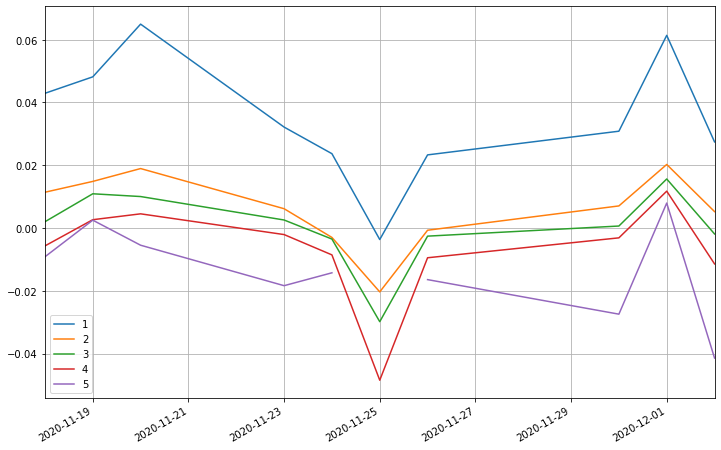

In [302]:
scores.plot(figsize=(12,8), grid=True)

In [299]:
data.shape

(875381, 123)